In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd 'drive/My Drive/Master/mlgs/project1A'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
[Errno 2] No such file or directory: 'drive/My Drive/Master/mlgs/project1A'
/content


In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import binom
import scipy.special as sc
from scipy.optimize import fsolve
from scipy.stats import pareto

In [3]:
def auction_exp(data_auction, p):
    """Train a normalizing flow model with maximum likelihood.

    Args:
        model: normalizing flow model. Flow or StackedFlows
        dataset: dataset containing data to fit. Dataset
        batch_size: number of samples per batch. int
        max_epochs: number of training epochs. int
        frequency: frequency for plotting density visualization. int
        
    Return:
        model: trained model. Flow or StackedFlows
        losses: loss evolution during training. list of floats
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #change the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

In [ ]:
reserve_p

array([1.03875925])

In [42]:
# Experiment pareto distribution:
# for x>=1 , b>0.
np.random.seed(5)
n = 1000000
b = 20
u, var = pareto.stats(b, moments='mv')
sigma  = np.sqrt(var)
print('u ='+ str(u))
print(sigma)
#not super accurate, but due to the character of cdf and pde maybe also factorial
r = sigma/u
print('r = ' + str(r))
def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            

p_d =  fsolve(F, [u])
print(p_d)
# np.isclose(F(x), [ 0.0])


bid_pareto = pareto.rvs(b,size=n)
#p_d = 1 + 4* (sigma/u)**2
reserve_p = p_d*u/(2*p_d-1)
print(reserve_p) 
 #opt should also be in the experiment, one is average and another sum of it. 
opt = 1
exp_revenue = auction_exp(bid_pareto,reserve_p)
u_revenue = auction_exp(bid_pareto,u)
DAPX_u = opt/u_revenue
DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('pareto distribution DAPX = ' + str(DAPX))
print('using mean DAPX = ' + str(DAPX_u))
print("Theoritically the DAPX_pareto:")


u =1.0526315789473684
0.05547855544155052
r = 0.052704627669472995
[1.17103387]
[0.91848362]
worst case robust DAPX = [1.17103387]
pareto distribution DAPX = [1.08875105]
using mean DAPX = 2.6457163068032354
Theoritically the DAPX_pareto:


In [44]:
bid_pareto

array([1.01263009, 1.10770853, 1.01164619, ..., 1.02082949, 1.0399607 ,
       1.06105096])

In [ ]:
# Experiment pareto distribution:
# for x>=0 , b>2, so we have mean and standard deviation the variable is x - 1
np.random.seed(5)
n = 1000000
b = 3
u, var = pareto.stats(b, moments='mv')
sigma = np.sqrt(var)
#not super accurate, but due to the character of cdf and pde maybe also factorial
r = sigma/(u-1)
print('r = ' + str(r))
def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            

p_d =  fsolve(F, [u])
print(p_d)
# np.isclose(F(x), [ 0.0])


bid_pareto = pareto.rvs(b,size=n)
#p_d = 1 + 4* (sigma/u)**2

reserve_p = p_d*u/(2*p_d-1)
print(reserve_p) 
#opt = b**2/(4*(b-a)) #opt should also be in the experiment, one is average and another sum of it. 
opt = 1
exp_revenue = auction_exp(bid_pareto-1,reserve_p)

DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('pareto distribution DAPX = ' + str(DAPX))
print("Theoritically the DAPX_pareto:")


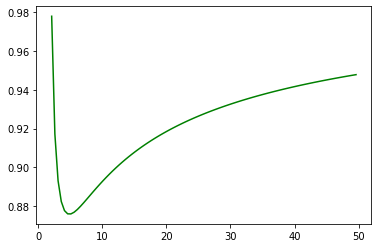

In [47]:

b_list = np.arange(2.1, 50, 0.5)
reserve_p_list = []

for b in b_list:
  u, var = pareto.stats(b, moments='mv')
  sigma = np.sqrt(var)
  r = sigma/u
  p_d =  fsolve(F, [u])

  reserve_p_list.append(p_d*u/(2*p_d-1))


plt.plot(b_list, reserve_p_list,color="green",label="reverse price VS parameter b")



In [ ]:
p_d

array([1.09377814])

In [48]:
sigma_list = []
DAPX_pareto = []
r_list =[]
reserve_p_list = []
p_d_list = []
step = np.arange(0, 50, 0.5)
n = 100000
for i in step:
  b = 2.5 + i
  u, var = pareto.stats(b, moments='mv')
  sigma = np.sqrt(var)
  data_pareto= pareto.rvs(b,size=n)

  r = sigma/u
  r_list.append(r)

  #p_d = 1 + 4* (sigma/u)**2
  p_d = fsolve(F, [u])
  p_d_list.append(p_d)
  reserve_p = p_d*u/(2*p_d-1)
  reserve_p_list.append(reserve_p)
  opt = 1
  #opt = b**2/(4*(b-a))
  exp_revenue = auction_exp(data_pareto,reserve_p)

  DAPX_pareto.append((opt/exp_revenue)[0])  

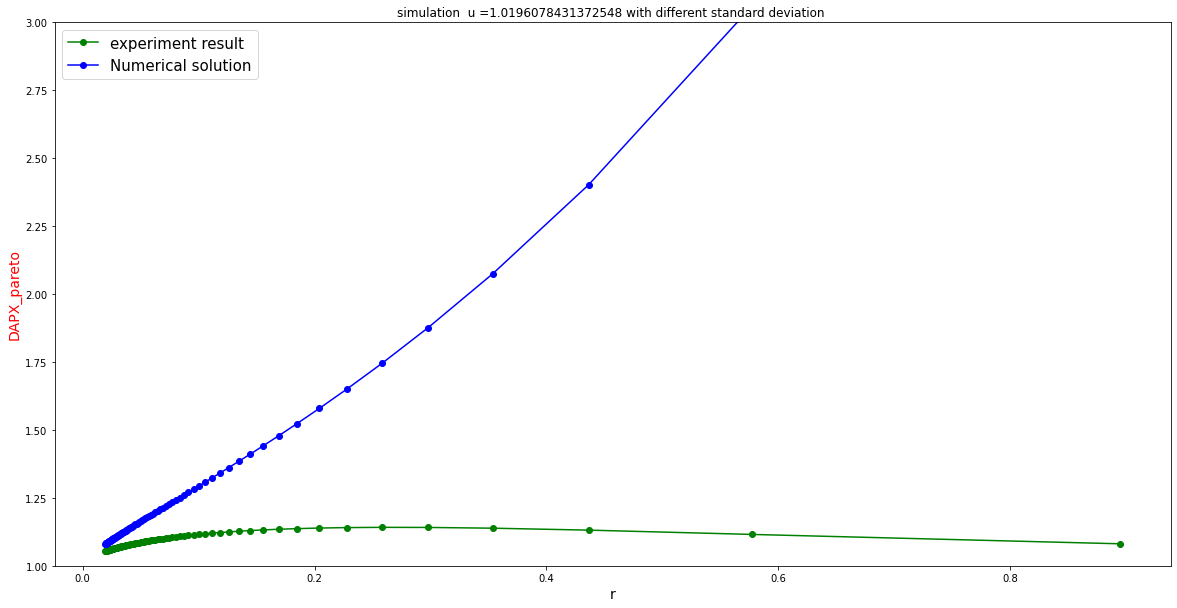

In [49]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
#ax.bar(r_list, DAPX_uniform, width = 0.005)
ax.plot(r_list, DAPX_pareto,color="green",marker="o",label="experiment result")
#ax.plot(polyline,  model(polyline),color="cadetblue")
# set x-axis label
ax.set_xlabel("r",fontsize=14)
# set y-axis label
ax.set_ylabel("DAPX_pareto",color="red",fontsize=14)
ax.set_ylim(1,3)
#ax.axhline(1,color="red")
# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax.plot(r_list, p_d_list,color="blue",marker="o",label="Numerical solution")
#ax2.set_ylabel("p_d",color="blue",fontsize=14)
#ax2.axhline(0,color="red")
plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')
plt.legend(loc="upper left",fontsize = 15)

plt.show()


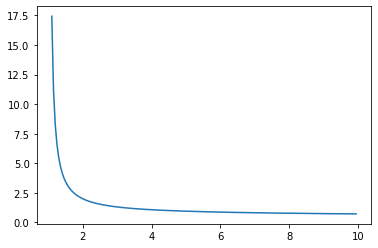

In [10]:
x = np.arange(1.1, 10, 0.05)
plt.plot(x, x/((x-1)**1.2))

In [20]:
(0.5)**1.2

0.43527528164806206

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


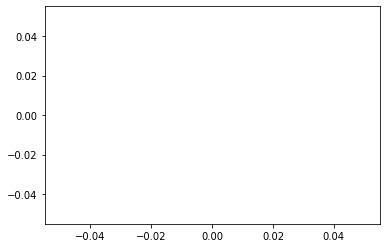

In [17]:
x = np.arange(0, 0.95, 0.05)
plt.plot(x, x/((x-1)**1.2))

In [ ]:
#polynomial fit with degree = 3
model = np.poly1d(np.polyfit(r_list, DAPX_uniform, 2))
#add fitted polynomial line to scatterplot
polyline = np.linspace(0.2, 0.5, 50)


fit1 = np.polyfit(r_list, DAPX_uniform, 2,full=True)
print(fit1)
fit2 = np.polyfit(r_list, DAPX_uniform, 3,full=True)
print(fit2)
fit3 = np.polyfit(r_list, DAPX_uniform, 4,full=True)
print(fit3)

(array([ 1.27229331, -0.39635363,  1.01584743]), array([5.60044326e-05]), 3, array([1.71814986, 0.21878689, 0.00966222]), 1.7763568394002505e-14)
(array([-3.73383765,  5.40248018, -1.8945457 ,  1.19391765]), array([2.19689157e-05]), 4, array([1.97328182e+00, 3.25064010e-01, 2.21740390e-02, 7.45486096e-04]), 1.7763568394002505e-14)
(array([  6.89949469, -13.90967817,  10.96536408,  -3.22994957,
         1.31265908]), array([2.16445001e-05]), 5, array([2.19419460e+00, 4.28980345e-01, 3.84984450e-02, 1.94940221e-03,
       5.51017290e-05]), 1.7763568394002505e-14)


Using 32 layers of radial flow should lead to a good reasonable fit of the data after 500 epochs. Traning with more layers and for more epochs would improve the density estimation but would take more time.